## Behavioral Cloning - Data Exploration

In [1]:
#import neccessary packages
import csv
from sklearn.utils import shuffle
import cv2
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import matplotlib.image as mpimg

In [2]:
def data_extraction(filename):
    """
    This function reads csv file and append to the list.  Return the sample list
    :param filename:
    :return: samples list
    """
    samples = []
    with open(filename) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            samples.append(line)
    return samples

def data_exploration(samples, text = ''):
    """
    This function is to plot the Steering distrubution across samples

    :param samples:
    :param text:
    :return:
    """
    steerings = []
    for steer in samples:
        steering = float(steer[3])
        steerings.append(steering)

    # Plot the histogram
    plt.rcParams["figure.figsize"] = [10, 5]
    axes = plt.gca()
    plt.hist(steerings, bins=20)
    plt.title('Steering Distribution across ' + text)
    plt.show()
    

def augment_brightness(image):
    """
    This function is to adjust the brightness of the image.

    First, I convert the image to HSV format.
    Using the numpy random uniform function to generate the random number between 0 and 1.
    Use that as the multiplication factor to adjust the brightness Value of HSV image.

    When that's done, I convert back to RGB format

    :param image:
    :return: image
    """
    image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = np.random.uniform()
    image[:, :, 2] = image[:, :, 2] *random_bright
    image = cv2.cvtColor(image,cv2.COLOR_HSV2RGB)
    return image


def plot_images ():
    """
    This function is to display six sample images.

    The 5th sample image also displays with the brightness adjusted.
    :return:
    """
    sample_dir = 'sample_images/'
    for i in range(6):
        image = mpimg.imread(sample_dir + 'image_%d.jpg' % (i + 1))
        if i == 5:
            image = augment_brightness(image)
        plt.rcParams["figure.figsize"] = [12, 4]
        plt.subplot(2,3,i+1)
        plt.imshow(image, aspect='auto')
        plt.axis('off')
    plt.suptitle('Explore Some Image Data')
    plt.show()
    




#### Below are the snippet of codes to explore the entire dataset:
As you can see from the histogram plot showing the steering distribution across the entire dataset, the steering angles tend to bias towards the left.

To generate more dataset, among the technique which I use to generate augmented data is to randomly adjust the brightness of the images as shown in the 6th image (darker) below.

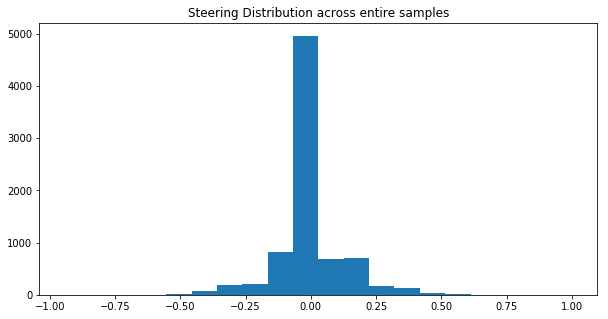

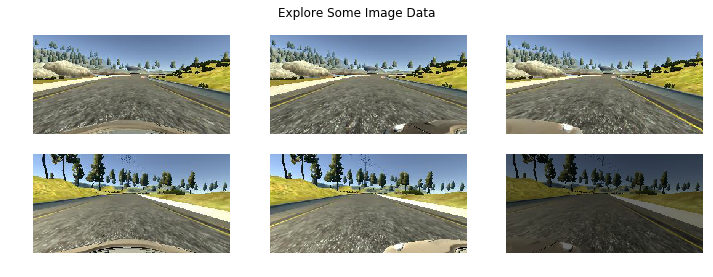

In [5]:
# Data extraction
filename = './data/data/driving_log.csv'
samples = data_extraction(filename)
    
# Data exploration for entire dataset
data_exploration(samples, text='entire samples')
plot_images()
    
    

#### 80/20 split to create train and validation data respectively

In [7]:
 # create train and validation data from gen
 train_samples, validation_samples = train_test_split(samples, test_size=0.2)

#### Data exploration for the train and validation samples

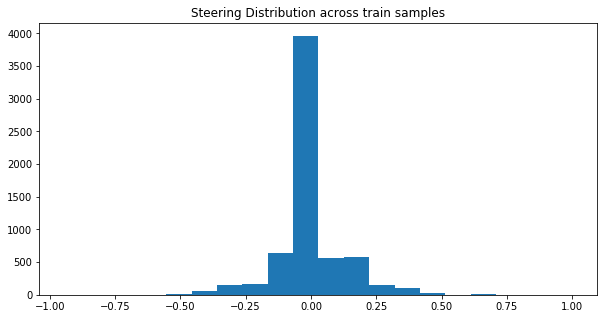

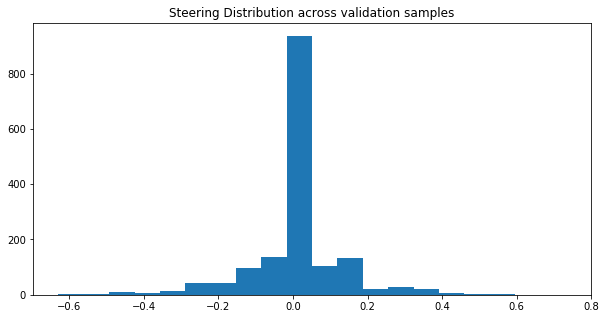

In [8]:
data_exploration(train_samples, text='train samples')
data_exploration(validation_samples, text = 'validation samples')


As you can see from the two histogram plots above, the training samples tend to bias towards the left whereas the validation samples tend to bias towards the right